# Question B1 (15 marks)

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [1]:
!pip install pytorch_tabular[extra]


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: D:\Program Files\Python310\python.exe -m pip install --upgrade pip


In [2]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

1.Divide the dataset (‘hdb_price_prediction.csv’) into train, validation and test sets by using entries from year 2019 and before as training data, year 2020 as validation data and year 2021 as test data.
**Do not** use data from year 2022 and year 2023.



In [3]:
df = pd.read_csv('hdb_price_prediction.csv')

# YOUR CODE HERE
train_data = df[df['year'] <= 2019]
val_data = df[df['year'] == 2020]
test_data = df[df['year'] == 2021]

2.Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [4]:
# YOUR CODE HERE
# define data
data_config = DataConfig(
    target=['resale_price'],
    continuous_cols=['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm'],
    categorical_cols=['month', 'town', 'flat_model_type', 'storey_range']
)

# define trainer
trainer_config = TrainerConfig(
    batch_size=1024,
    max_epochs=50,
    auto_lr_find=True  # to find an optimal lr
)

# define model
model_config = CategoryEmbeddingModelConfig(
    task='regression',
    layers='50'
)

# define optimizer
optimizer_config = OptimizerConfig(
    optimizer='Adam'
)

# initialization
model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

# train the model
model.fit(train=train_data, validation=val_data, seed=SEED)

# test the model
res = model.evaluate(test_data)
pred = model.predict(test_data)

2024-03-13 00:50:29,257 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-03-13 00:50:29,301 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-03-13 00:50:29,328 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-03-13 00:50:29,463 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: CategoryEmbeddingModel

2024-03-13 00:50:29,524 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-03-13 00:50:30,611 - {pytorch_tabular.tabular_model:630} - INFO - Auto LR Find Started

You are using a CUDA device ('NVIDIA GeForce RTX 4060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
D:\Program Files\Python310\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:639: Checkpoint directory E:\git\SC4001\Programming Assignment\saved_models exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\Program Files\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
D:\Program Files\Python310\lib\site-packages\pytorch_lightning\trainer\connectors\

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at E:\git\SC4001\Programming Assignment\.lr_find_48de1857-b168-4245-a9e5-0db302ad89ec.ckpt
Restored all states from the checkpoint at E:\git\SC4001\Programming Assignment\.lr_find_48de1857-b168-4245-a9e5-0db302ad89ec.ckpt


2024-03-13 00:50:48,811 - {pytorch_tabular.tabular_model:643} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2024-03-13 00:50:48,827 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

2024-03-13 00:51:07,587 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-03-13 00:51:07,590 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       6465972736.0        │
│  test_mean_squared_error  │       6465972736.0        │
└───────────────────────────┴───────────────────────────┘

3.Report the test RMSE error and the test R2 value that you obtained.



In [5]:
# YOUR CODE & RESULT HERE
from sklearn.metrics import r2_score

# report RMSE and R2
RMSE = np.sqrt(res[0]['test_mean_squared_error'])
r2 = r2_score(test_data['resale_price'], pred['resale_price_prediction'])

print(f"RMSE: {RMSE}")
print(f"R2: {r2}")

RMSE: 80411.27244360706
R2: 0.7555578327813541


4.Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. Identify a trend in these poor predictions and suggest a way to reduce these errors.



In [6]:
# YOUR CODE & RESULT HERE
# we use squared difference to be the error here
test_data['resale_price_prediction'] = pred['resale_price_prediction']
test_data['error'] = (test_data['resale_price'] - test_data['resale_price_prediction']) ** 2
sorted = test_data.sort_values(by='error', ascending=False)
top_25 = sorted.head(25)
top_25

C:\Users\Chihao Shen\AppData\Local\Temp\ipykernel_30860\1095613762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['resale_price_prediction'] = pred['resale_price_prediction']
C:\Users\Chihao Shen\AppData\Local\Temp\ipykernel_30860\1095613762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['error'] = (test_data['resale_price'] - test_data['resale_price_prediction']) ** 2


,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,resale_price_prediction,error
92405,11,2021,BUKIT MERAH,46 SENG POH ROAD,Tiong Bahru,0.581977,2.309477,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,780000.0,360914.6250,1.756326e+11
105372,2,2021,QUEENSTOWN,46 STIRLING ROAD,Commonwealth,0.570988,4.922054,0.016807,0.005350,"4 ROOM, Terrace",46.916667,134.0,01 TO 03,975000.0,561211.6875,1.712208e+11
106192,12,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.333333,109.0,04 TO 06,968000.0,560444.8750,1.661012e+11
105869,8,2021,QUEENSTOWN,42 STIRLING ROAD,Queenstown,0.554599,4.841933,0.016807,0.008342,"4 ROOM, Terrace",46.416667,120.0,01 TO 03,930000.0,535871.5625,1.553372e+11
106057,10,2021,QUEENSTOWN,92 DAWSON ROAD,Queenstown,0.584731,3.882019,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.500000,97.0,13 TO 15,958000.0,574577.0000,1.470132e+11
105695,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,97.0,07 TO 09,930000.0,549269.4375,1.449558e+11
105696,6,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,109.0,10 TO 12,950000.0,583298.4375,1.344700e+11
92442,11,2021,BUKIT MERAH,127D KIM TIAN ROAD,Tiong Bahru,0.686789,2.664024,0.016807,0.047782,"5 ROOM, Improved",90.333333,113.0,16 TO 18,1165000.0,799521.9375,1.335742e+11
105702,6,2021,QUEENSTOWN,150 MEI LING STREET,Queenstown,0.245207,4.709043,0.016807,0.008342,"EXECUTIVE, Apartment",73.416667,148.0,10 TO 12,1235000.0,869783.4375,1.333831e+11
105699,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,109.0,31 TO 33,1032888.0,670265.9375,1.314948e+11


We can observe from the above dataframe and the plots below that these flats have some similar features. For instances, most flats have its model to be 4 ROOM, Premium Apartment Loft; most flats are close to Queenstown; most flats have shorter distances to the nearest MRT station and Dhoby Ghaut MRT station. These indicates that these flats have relatively higher resale price. We can also observe this from the scatter plots and data below, where the resale price has a correlation of 0.45 with the error. Therefore, the flats that has relatively higher resale price tend have trends to be predicted poorly by the model.

Additionally, from the first line plot below, we can figure out that the predicted prices seem to have trends to be lower than the actual resale prices.

To reduce these errors, we can

1. Refine data sampling such that the data should be distributed equally within both high-priced and ordinary properties. It is possible that the data are mostly concentrate on properties having ordinary values, which may cause the models to be biased, resulting in model performing not well on those data with properties having high-priced values.

2. We can add interaction terms to the model. Since some terms may highly correlated to each other, for example, flats have premium settings tend to near MRT stations and have a relatively higher resale price, therefore, adding interaction terms may increase the performance of the model.

3. Enhance model robustness by increasing the number of hidden layers, number of neurons in each layer, and adjusting the training configurations such as type of optimizer, number of max epoch and batch size.

4. Adding additional regularization terms such as using L1 or L2 norms to prevent the model from overfitting problem in order to help the model perform better on generalized data.

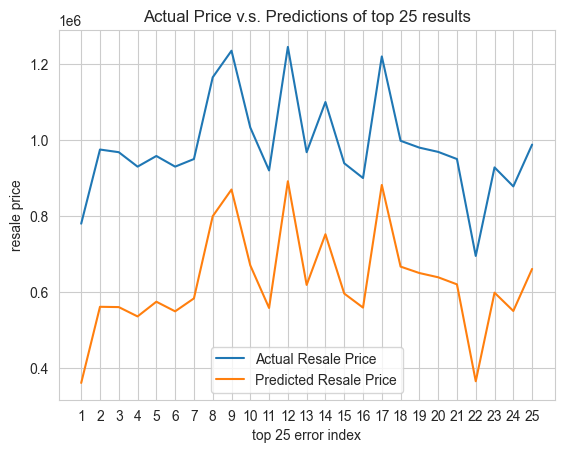

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

x = range(1, 26)

# plot the difference between actual and predicted values
plt.plot(x, top_25['resale_price'], label='Actual Resale Price')
plt.plot(x, top_25['resale_price_prediction'], label='Predicted Resale Price')
plt.xlabel('top 25 error index')
plt.ylabel('resale price')
plt.xticks(x)
plt.legend()
plt.title("Actual Price v.s. Predictions of top 25 results")
plt.show()

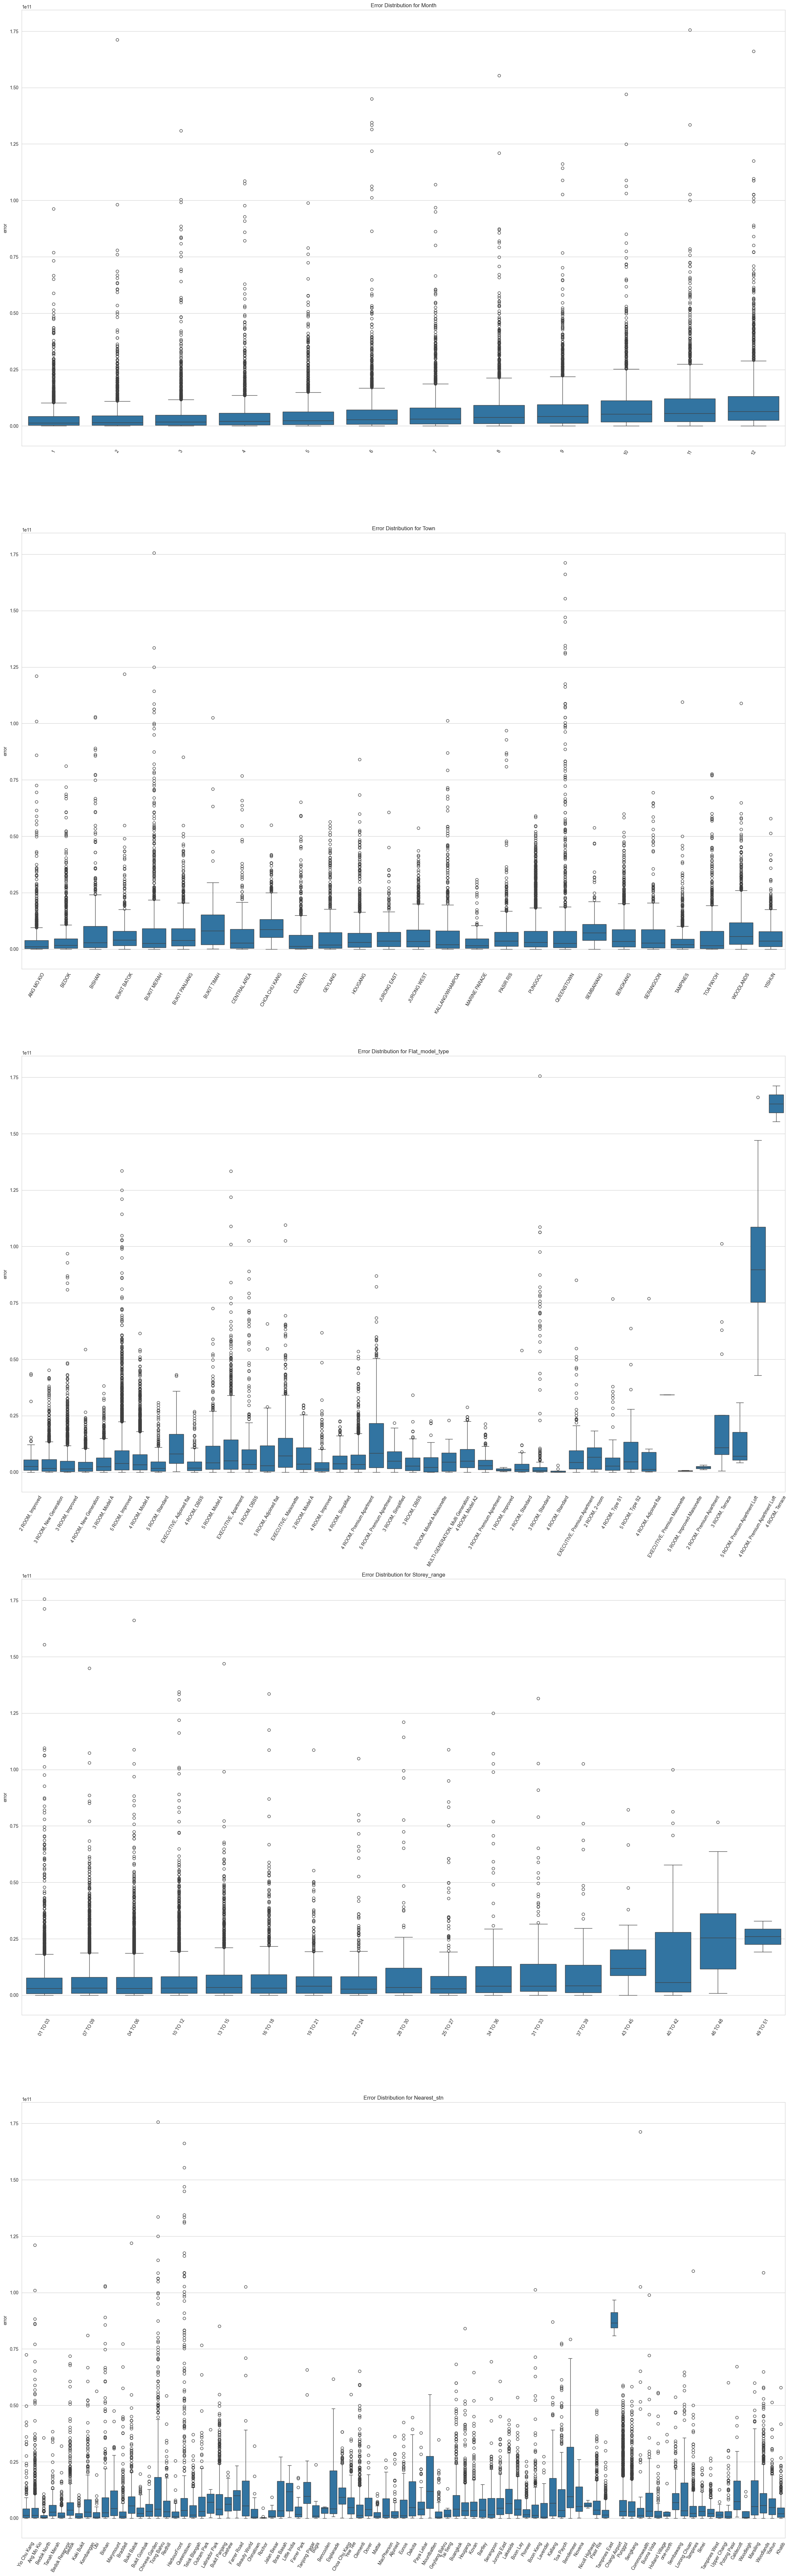

In [8]:
# plot the distribution and trend for categorical features
categorical_features = ['month', 'town', 'flat_model_type', 'storey_range', 'nearest_stn']

fig, axes = plt.subplots(5, 1, figsize=(30, 100))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.boxplot(data=test_data, x=feature, y='error', ax=axes[i])
    axes[i].set_title(f'Error Distribution for {feature.capitalize()}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('error')
    axes[i].tick_params(axis='x', rotation=60)

plt.show()

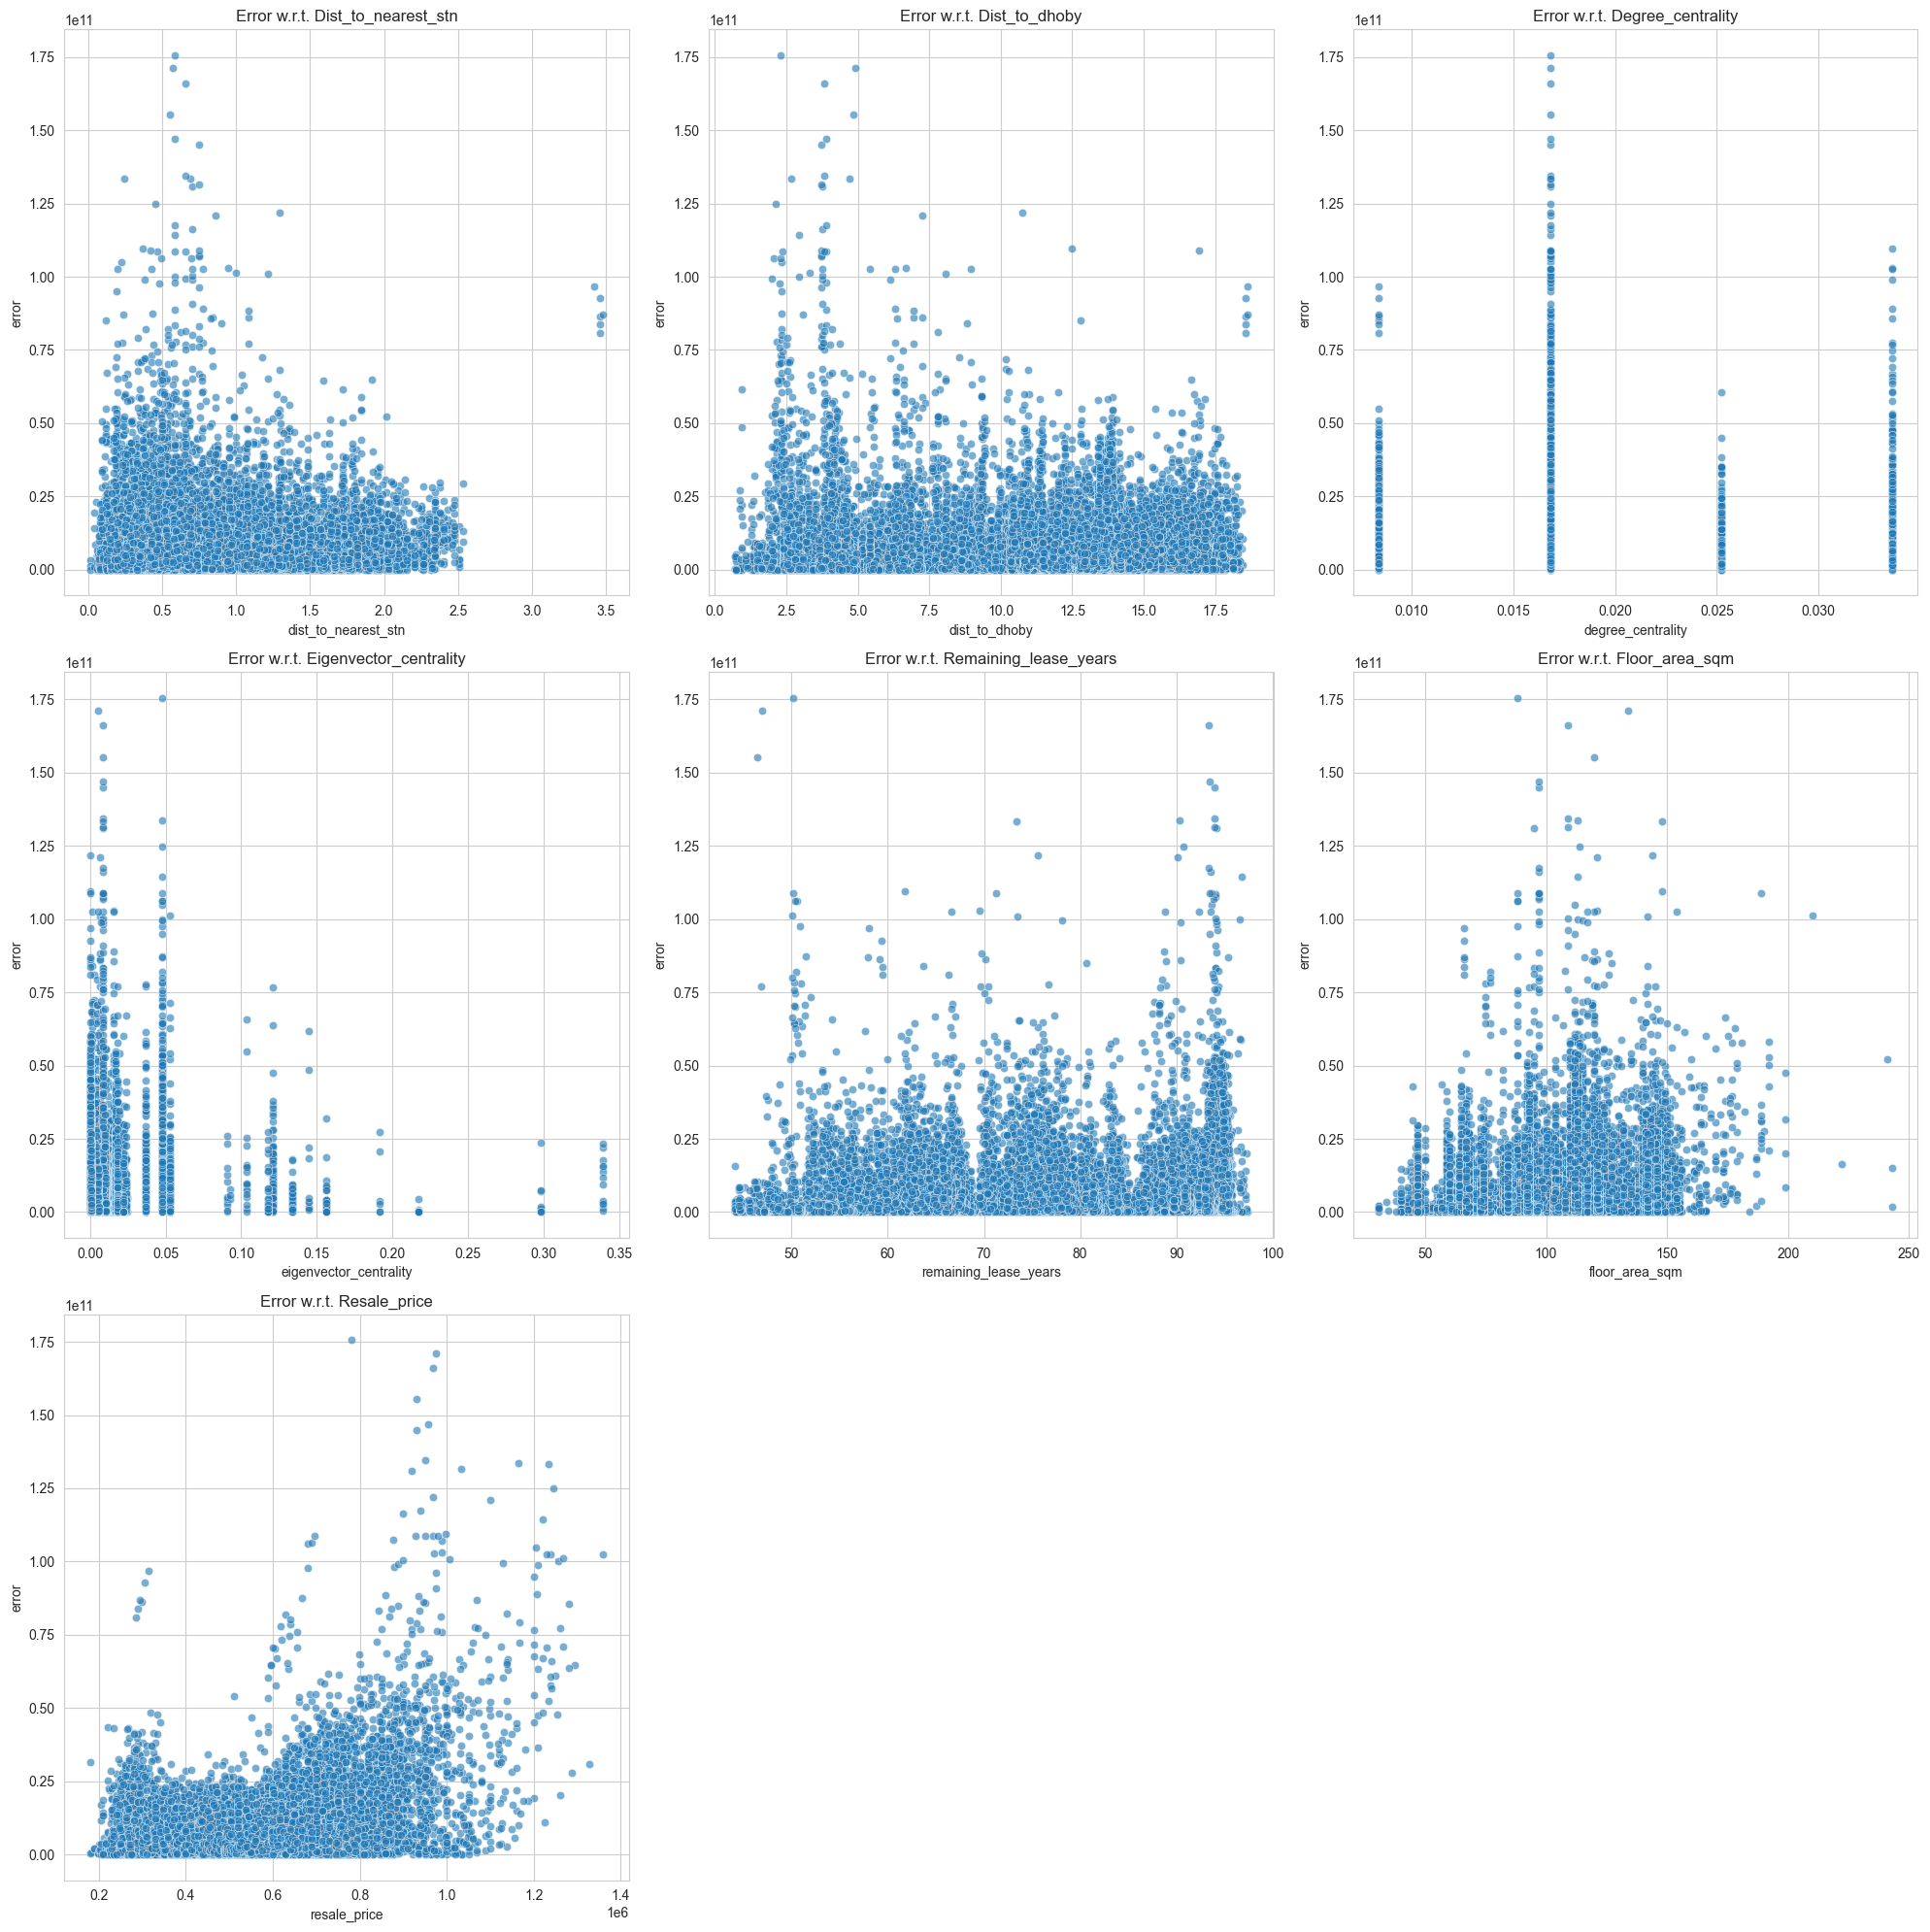

In [9]:
# plot the distribution and trend for continuous features
continuous_features = [
    'dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 
    'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm',
    'resale_price'
]

plt.figure(figsize=(20, 20))

# create scatter plots
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=test_data, x=feature, y='error', alpha=0.6)
    plt.title(f'Error w.r.t. {feature.capitalize()}')

plt.tight_layout()
plt.show()


In [10]:
# calculate the correlation
selected_features = continuous_features + ['error']
correlation_matrix = test_data[selected_features].corr()
error_correlations = correlation_matrix['error'].drop('error')
error_correlations

dist_to_nearest_stn       0.019910
dist_to_dhoby            -0.029786
degree_centrality        -0.023117
eigenvector_centrality    0.038742
remaining_lease_years     0.115610
floor_area_sqm            0.190438
resale_price              0.451428
Name: error, dtype: float64

In [11]:
model.save_model("b1")